# Data Analysis and Visualization

## Setup

- Import libraries
- Mount drive
- Import data analysis class
- Read in cleaned data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import class with functions for data analysis
import sys
sys.path.append("/content/drive/My Drive/fe-eda/Python Code/")

from County_Analysis_Class import *


In [ ]:
# Read in cleaned data
# Define directory where cleaned data was saved
data_dir =  "/content/drive/My Drive/fe-eda/Data_Cleaned/"

df_county = pd.read_csv(data_dir + 'County_Level_Data.csv')

In [ ]:
# Style for plots
plt.style.use('ggplot')

## Food desert visualizations

In [ ]:
# Create categroical column for metro vs non-metro
df_county['Metro'] = np.where(df_county['METRO13']==0, "Non-metro", "Metro")

Population

In [ ]:
ax = sns.scatterplot(data=df_county, x='2010_Census_Population', y='PCT_LACCESS_LOWI15', alpha = 0.2)
ax.set(xscale='log')
plt.xlabel("Census Population (log)")
plt.ylabel("Percent with Low Income and Low Access")
plt.title("Populations versus Food Access")
# Counties with lower populations tend to have higher percent with low income and low access (i.e. food deserts)

Metro

In [ ]:
ax = sns.scatterplot(data=df_county, x='2010_Census_Population', y='PCT_LACCESS_LOWI15', hue='Metro', alpha = 0.2)
ax.set(xscale='log')
plt.xlabel("Census Population (log)")
plt.ylabel("Percent with Low Income and Low Access")
plt.title("Populations versus Food Access by Metro")
# Low population and food deserts tend to be in non-metro ares

In [ ]:
sns.boxplot(data=df_county,x="Metro",y="PCT_LACCESS_LOWI15")
# Confirms analysis before that non-metro more likely to be food deserts

In [ ]:
sns.boxplot(data=df_county,x="Metro",y="PCT_LACCESS_LOWI15",showfliers=False)
# this version removes outliers to more clearly see the difference

Region

In [ ]:
# By region
# Table with mappings from state to region
df_region = pd.read_csv(data_dir + 'State and Region.csv')

In [ ]:
# Join dataframes to get region categories
df_county = pd.merge(df_county, df_region, how='inner', on = 'State')

In [ ]:
# Create dataframe for each region
df_west = df_county[df_county['Region']=='West']
df_east = df_county[df_county['Region']=='Northeast']
df_midwest = df_county[df_county['Region']=='Midwest']
df_south = df_county[df_county['Region']=='South']

In [ ]:
grid = sns.FacetGrid(df_county, col='Region')
grid.map(sns.boxplot, 'Metro', 'PCT_LACCESS_LOWI15', showfliers=False)

In [ ]:
ax = sns.scatterplot(data=df_county, x='2010_Census_Population', y='PCT_LACCESS_LOWI15', hue='Region', alpha = 0.2)
ax.set(xscale='log')
plt.xlabel("Census Population (log)")
plt.ylabel("Percent with Low Income and Low Access")
plt.title("Populations versus Food Access by Region")


In [ ]:
sns.boxplot(data=df_county,x="Region",y="PCT_LACCESS_LOWI15",showfliers=False)


Ethnicity

In [ ]:
df_county["BlackG"] = np.where(df_county["PCT_NHBLACK10"]<5, "Less than 5%", 
                               np.where(df_county["PCT_NHBLACK10"]<10, "5 to 10%",
                                        np.where(df_county["PCT_NHBLACK10"]<20, "10 to 20%",
                                                 "Over 20%")
                                        )
                              )

In [ ]:
df_county["HispG"] = np.where(df_county["PCT_HISP10"]<5, "Less than 5%", 
                               np.where(df_county["PCT_HISP10"]<10, "5 to 10%",
                                        np.where(df_county["PCT_HISP10"]<20, "10 to 20%",
                                                 "Over 20%")
                                        )
                              )

In [ ]:
df_county["AsianG"] = np.where(df_county["PCT_NHASIAN10"]<5, "Less than 5%", 
                               np.where(df_county["PCT_NHASIAN10"]<10, "5 to 10%",
                                        np.where(df_county["PCT_NHASIAN10"]<20, "10 to 20%",
                                                 "Over 20%")
                                        )
                              )

In [ ]:
box = sns.factorplot(x='BlackG', y='PCT_LACCESS_LOWI15', kind='box', 
               data=df_county,showfliers=False).set(        
    xlabel='Percentage of Black Population', 
    ylabel='Percent Low Access and Low Income')                     
                
plt.title("Boxplots of Percent Low Access and Low Income by Percentage of Black Population")
plt.xticks(rotation=45)

In [ ]:
box = sns.factorplot(x='HispG', y='PCT_LACCESS_LOWI15', kind='box', 
               data=df_county,showfliers=False).set(        
    xlabel='Percentage of Hispanic Population', 
    ylabel='Percent Low Access and Low Income')                     
                
plt.title("Boxplots of Percent Low Access and Low Income by Percentage of Hispanic Population")
plt.xticks(rotation=45)

In [ ]:
box = sns.factorplot(x='AsianG', y='PCT_LACCESS_LOWI15', kind='box', 
               data=df_county,showfliers=False).set(        
    xlabel='Percentage of Asian Population', 
    ylabel='Percent Low Access and Low Income')                     
                
plt.title("Boxplots of Percent Low Access and Low Income by Percentage of Asian Population")
plt.xticks(rotation=45)

Obsesity and diabetes

In [ ]:
# Define food deserts as over 30%
df_county['Food_Desert'] = np.where(df_county['PCT_LACCESS_POP15']>30, "Food Desert", "Not a Food Desert")

In [ ]:
ax = sns.scatterplot(data=df_county, x='PCT_LACCESS_POP15', y='PCT_DIABETES_ADULTS13', alpha = 0.2)

In [ ]:
# Box plot diabetes food desert vs not
sns.boxplot(data=df_county,x="Food_Desert",y="PCT_DIABETES_ADULTS13",showfliers=False)

In [ ]:
# Box plot obesity food desert vs not (but obesity is state level...)
sns.boxplot(data=df_county,x="Food_Desert",y="PCT_OBESE_ADULTS17",showfliers=False)

## Analysis of a Single State

Showcase functionality of analysis class by analyzing a single state (in this example, NY)
1. Filter data down to selected state
2. Remove columns/rows with large % missing values
3. Find and keep only the most recent data points (i.e. keep LACCESS_POP15 and drop LACCESS_POP10)
4. Find "hidden" state level columns (columns that don't vary within a state) and drop them
5. Select target variable of interest (for correlation calculations and visualizations)
6. Calculate correlations between variable of interest and all others
7. Create scatterplots for variable of interest and a few from correlation analysis


**Motivation:** For many of the variables there was so much variability and noise in the data that it was difficult to visualize relationships between variables of interest. In addition, we thought it would be useful for certain types of analysis to be able to dig deeper into the counties in a single state.

**Example:** For the purpose of this example we’ve chosen New York, but we’ve built in the functionality to make this process repeatable for the analysis of any state. We’ve chosen New York for this example because it is a pretty large state and also had the largest value for food insecurity in this dataset. 

In [ ]:
# Create new instance of analysis class
ny_analysis = countyAnalysis(df_county) 

In [ ]:
# Filter to NY
ny_analysis.select_state('NY')

In [ ]:
# Remove any columns with a high % missing
ny_analysis.remove_missing_threshold_cols(threshold = 0.3)
# Same for rows
ny_analysis.remove_missing_threshold_rows(threshold = 0.3)

Removing columns with greater than 30.0% missing
Removing rows (counties) with greater than 30.0% missing


In [ ]:
# Find and keep only the most recent column for matching ones 
# (i.e. keep LACCESS_POP15 and drop LACCESS_POP10)
ny_analysis.find_most_recent_data(drop = True)

In [ ]:
# Find columns that don't vary within a state and drop them
ny_analysis.find_zero_variance_state_cols(drop = True)

In [ ]:
# Prompt user to select target variable of interest (i.e. for correlation calculations)
# ny_analysis.select_target_var() # PCT_DIABETES_ADULTS13
ny_analysis.target_var = 'PCT_DIABETES_ADULTS13' 

In [ ]:
# Calculate correlations between variable of interest and all others
# By default reutrns top 10 positve and top 10 negative, but can adjust
ny_analysis.calculation_correlations_with_variable(num_pos_corr=5, num_neg_corr=5)

Please select a variable of interest: 
PCT_DIABETES_ADULTS13
Top 5 largest (positives) correlations with PCT_DIABETES_ADULTS13: 
CHILDPOVRATE15            0.507342
SNAPSPTH17                0.479750
PCT_FREE_LUNCH15          0.474594
PCH_VEG_ACRESPTH_07_12    0.464768
WICSPTH16                 0.450395
dtype: float64
Top 5 smallest (negative) correlations PCT_DIABETES_ADULTS13: 
RECFACPTH16        -0.554978
MEDHHINC15         -0.486162
RECFAC16           -0.385710
FFRPTH16           -0.358336
FMRKT_ANMLPROD18   -0.295289
dtype: float64


Using the correlations with diabetes as a guide, we’ve visualized the relationship between different variables and diabetes in New York. 

Text(0.5, 1.0, 'Relationship Between Poverty and Diabetes')

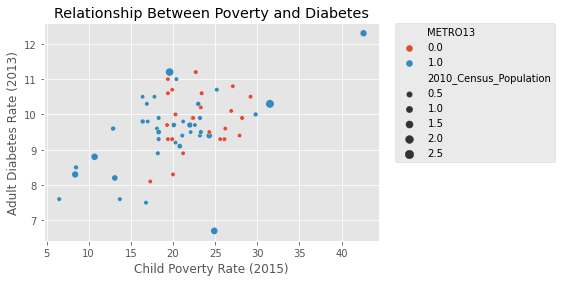

In [ ]:
# Create scatterplot for variables of interest and another
# Chose second variable based on correlations
sns.scatterplot(data=ny_analysis.df_county, x='CHILDPOVRATE15', y='PCT_DIABETES_ADULTS13', size='2010_Census_Population', hue='METRO13')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Put the legend out of the figure
plt.xlabel("Child Poverty Rate (2015)")
plt.ylabel("Adult Diabetes Rate (2013)")
plt.title("Relationship Between Poverty and Diabetes")


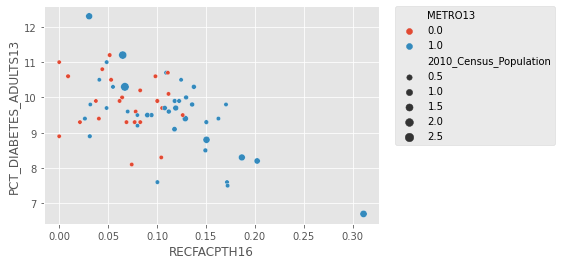

In [ ]:
# Create scatterplot for variables of interest and another
# Chose second variable based on correlations
sns.scatterplot(data=ny_analysis.df_county, x='RECFACPTH16', y='PCT_DIABETES_ADULTS13', size='2010_Census_Population', hue='METRO13')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# More recreational fitness facilities associated with lower diabetes rates

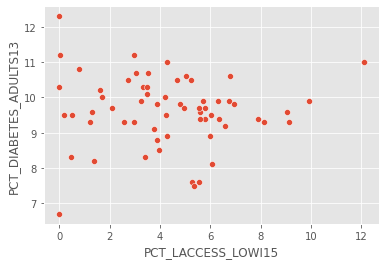

In [ ]:
# Create scatterplot for variables of interest and another
# Chose second variable based on correlations
sns.scatterplot(data=ny_analysis.df_county, x='PCT_LACCESS_LOWI15', y='PCT_DIABETES_ADULTS13')

# Not a very strong relationship between diabetetes and low access

In [ ]:
# State level variable 
# Household food insecurity (%, three-year average), 2015-17*
# FOODINSEC_15_17
df_state_FOODINSEC_15_17 = df_county.groupby('State')['FOODINSEC_15_17'].mean() # Mean, but same value for all counties in state
df_state_FOODINSEC_15_17.sort_values(ascending=False).head(10)

State
NY    17.9
AZ    17.4
LA    17.3
MO    17.2
AL    16.3
OK    15.0
WI    14.9
KY    14.7
NE    14.4
MA    14.4
Name: FOODINSEC_15_17, dtype: float64

## Persistent Poverty County Analysis

Analyze differences between persistent-poverty counties and other counties. Differences by region? Race? Which variables show the largest difference?

Similar setup to other analysis:
- Create instance of county analysis class
- Remove columns and rows with high percent missing
- Find and keep only the most recent data points (i.e. keep LACCESS_POP15 and drop LACCESS_POP10)
- Find "hidden" state level columns (columns that don't vary within a state) and drop them

Analysis:
- Pie chart showing what percent of counties are categorized as persistent-poverty
- Bar graph of percent of counties are categorized as persistent-poverty by region
- Calculate averages of some variables in persistent-poverty versus other counties
  - Demographic variables (poverty rate, metro, race/ethnicity)
  - Health variables (diabetes rate, recreational/fitness facilities)
  - Food access (low access, low income and low access, low access and no car)
  - Store avaliability (grocery stores, convenience stores, fast food restaurants, full service restaurants)

In [ ]:
pov_persist = countyAnalysis(df_county)

NameError: ignored

In [ ]:
# Remove any columns with a high % missing
pov_persist.remove_missing_threshold_cols(threshold = 0.3)
# Same for rows (counties)
pov_persist.remove_missing_threshold_rows(threshold = 0.3)

In [ ]:
# Find and keep only the most recent column for matching ones 
# (i.e. keep LACCESS_POP15 and drop LACCESS_POP10)
pov_persist.find_most_recent_data(drop = True)

In [ ]:
# Find columns that don't vary within a state and drop them
pov_persist.find_zero_variance_state_cols(drop = True)

In [ ]:
# Create labeled version of persistent poverty (labels instead of 0/1)
pov_persist.labeled_categorical_cols()
# pov_persist.df_county['Persistent_Poverty'] = np.where(pov_persist.df_county['PERPOV10'] == 1, "Persistent-Poverty", "Other")

In [ ]:
# what percent of counties are poverty persistent?
pov_persist.df_county.Persistent_Poverty.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.title('Portion of Counties that are Persistent-Poverty')

In [ ]:
# Add region column
pov_persist.append_region(data_dir)
# pov_persist.df_county = pd.merge(pov_persist.df_county , df_region, how='inner', on = 'State')

In [ ]:
# Poverty-Persistency by region
# Calculate percent of counties with poverty persistence in each region
pov_by_region = pov_persist.average_by_category('Region', 'PERPOV10')

# Plot
sns.barplot(data=pov_by_region, x='Region', y='PERPOV10')
plt.title('Persistent Poverty by Region')
plt.xlabel('Region')
plt.ylabel('Portion of Counties')

In [ ]:
# Caclulate averages of columns of interest for persistent poverty vs other counties
# Demographic columns
demographic_cols = ['POVRATE15', 'METRO13', 'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10']
demo_by_pov = pov_persist.average_by_category('Persistent_Poverty', demographic_cols)
demo_by_pov

# Nearly double the poverty rate, More non-metro, lower percentage of whites, higher black and hispanic, lower asian, slightly younger population

In [ ]:
# Caclulate averages of columns of interest for persistent poverty vs other counties
# Health columns
health_cols = ['PCT_DIABETES_ADULTS13', 'RECFACPTH16']
health_by_pov = pov_persist.average_by_category('Persistent_Poverty', health_cols)
health_by_pov
# Higher diabetes rates, fewer recreational facilities per 1000

In [ ]:
# Caclulate averages of columns of interest for persistent poverty vs other counties
# Food access
access_cols = ['PCT_LACCESS_POP15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_LOWI15']
access_by_pov = pov_persist.average_by_category('Persistent_Poverty', access_cols)
access_by_pov
# Slightly smaller percentage of population with low access to store
# But much larger percentage that have low access and no car 
# Also larger percentage with low access and low income

In [ ]:
# Caclulate averages of columns of interest for persistent poverty vs other counties
# Here look at store avaliability columns
store_cols = ['GROCPTH16', 'CONVSPTH16', 'FFRPTH16', 'FSRPTH16']
store_by_pov = pov_persist.average_by_category('Persistent_Poverty', store_cols)
store_by_pov
# Similar grocery store avaliability, but higher convenience stores, similar or a bit lower for fast food, and much lower for full service restauants

some other plot options....

In [ ]:
sns.scatterplot(data=pov_persist.df_county, x='PCT_LACCESS_POP15', y='PCT_DIABETES_ADULTS13', hue='PERPOV10', alpha=0.2)


In [ ]:
df_agg = pov_persist.df_county.groupby('PERPOV10').agg({'PCT_NHWHITE10': ['mean'], 'PCT_NHBLACK10': ['mean'], 'PCT_HISP10': ['mean'], 'PCT_NHASIAN10': ['mean'], 'PCT_NHNA10': ['mean'], 'PCT_NHPI10': ['mean']})
df_agg.plot(figsize=(30,10), kind='bar', title="Population based on Race in 2010", stacked=True).legend(bbox_to_anchor= (1.02, 1));

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(28,5)
width = 0.4
fig.subplots_adjust(wspace=1.0)
df_agg_east = df_east.groupby('PERPOV10').agg({'PCT_NHWHITE10': ['mean'], 'PCT_NHBLACK10': ['mean'], 'PCT_HISP10': ['mean'], 'PCT_NHASIAN10': ['mean'], 'PCT_NHNA10': ['mean'], 'PCT_NHPI10': ['mean']})
df_agg_east.plot(kind='bar', stacked=True, ax=ax1).legend(bbox_to_anchor= (1.02, 1));
ax1.set_title("Population by races in Northeast")
df_agg_west = df_west.groupby('PERPOV10').agg({'PCT_NHWHITE10': ['mean'], 'PCT_NHBLACK10': ['mean'], 'PCT_HISP10': ['mean'], 'PCT_NHASIAN10': ['mean'], 'PCT_NHNA10': ['mean'], 'PCT_NHPI10': ['mean']})
df_agg_west.plot(kind='bar', stacked=True, ax=ax2).legend(bbox_to_anchor= (1.02, 1));
ax2.set_title("Population by races in West")
df_agg_midwest = df_midwest.groupby('PERPOV10').agg({'PCT_NHWHITE10': ['mean'], 'PCT_NHBLACK10': ['mean'], 'PCT_HISP10': ['mean'], 'PCT_NHASIAN10': ['mean'], 'PCT_NHNA10': ['mean'], 'PCT_NHPI10': ['mean']})
df_agg_midwest.plot(kind='bar', stacked=True, ax=ax3).legend(bbox_to_anchor= (1.02, 1));
ax3.set_title("Population by races in Midwest")
df_agg_south = df_south.groupby('PERPOV10').agg({'PCT_NHWHITE10': ['mean'], 'PCT_NHBLACK10': ['mean'], 'PCT_HISP10': ['mean'], 'PCT_NHASIAN10': ['mean'], 'PCT_NHNA10': ['mean'], 'PCT_NHPI10': ['mean']})
df_agg_south.plot(kind='bar', stacked=True, ax=ax4).legend(bbox_to_anchor= (1.02, 1));
ax4.set_title("Population by races in South")
plt.show()
